In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime
# %matplotlib notebook

In [2]:
#Datetime is in ISO format - maybe UTC ?
low_date = '2021-06-01T00:00:00'
up_date = '2021-06-28T23:30:00'

In [3]:
vanc_temp_ser = []
vanc_time_ser = []
vanc_iso_time_ser = []

fname = '71891099999.csv' #Lytton, CA
# fname = '71765099999.csv'
with open(fname, newline='') as csvfile: 
    reader = csv.DictReader(csvfile)
    for row in reader:
#         temp = row['DEW']
        temp = row['TMP']
        Loc_vanc = row['NAME']
        temp = temp.split(',')
        vanc_time = datetime.datetime.fromisoformat(row['DATE']).timestamp()
        vanc_time_ser = np.append(vanc_time_ser, vanc_time)
        vanc_iso_time_ser = np.append(vanc_iso_time_ser, datetime.datetime.fromisoformat(row['DATE']))
#         print(row['DATE'], float(temp[0]))
        if temp[1]=='1':
            vanc_temp_ser = np.append(vanc_temp_ser,float(temp[0]))            
        else:
            vanc_temp_ser = np.append(vanc_temp_ser, -1e6)
            
low_tstamp = datetime.datetime.fromisoformat(low_date).timestamp()
high_tstamp = datetime.datetime.fromisoformat(up_date).timestamp()

indices_vanc = np.where((vanc_time_ser>low_tstamp) & (vanc_time_ser<high_tstamp))[0]

In [4]:
pe_temp_ser = []
pe_time_ser = []
pe_iso_time_ser = []

fname = '94610099999.csv'

with open(fname, newline='') as csvfile: 
    reader = csv.DictReader(csvfile)
    for row in reader:
#         temp = row['DEW']
        temp = row['TMP']
        Loc_pe = row['NAME']
        temp = temp.split(',')
        pe_time = datetime.datetime.fromisoformat(row['DATE']).timestamp()
        pe_time_ser = np.append(pe_time_ser, pe_time)
        pe_iso_time_ser = np.append(pe_iso_time_ser, datetime.datetime.fromisoformat(row['DATE']))
#         print(row['DATE'], float(temp[0]))
        if temp[1]=='1':
            pe_temp_ser = np.append(pe_temp_ser,float(temp[0]))            
        else:
            pe_temp_ser = np.append(pe_temp_ser, -1e6)
            
low_tstamp = datetime.datetime.fromisoformat(low_date).timestamp()
high_tstamp = datetime.datetime.fromisoformat(up_date).timestamp()

indices_pe = np.where((pe_time_ser>low_tstamp) & (pe_time_ser<high_tstamp))[0]

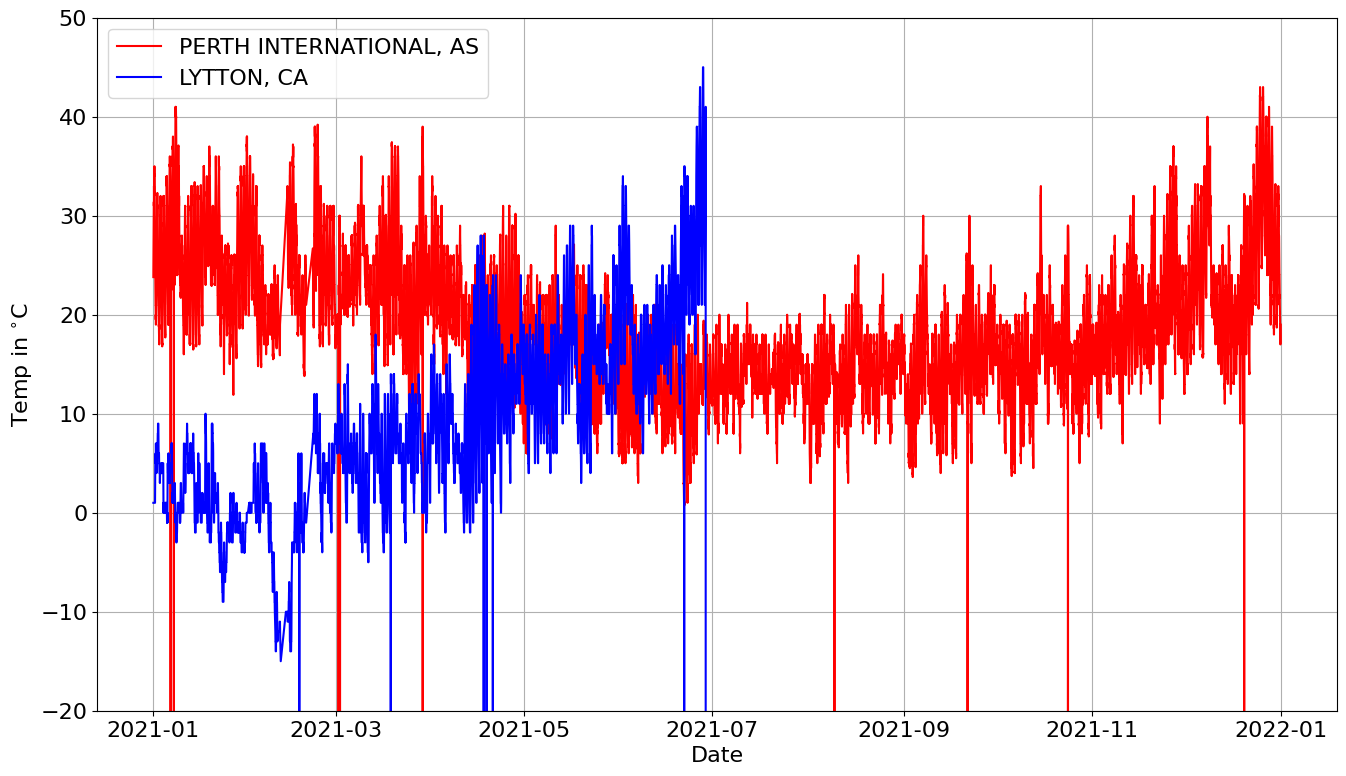

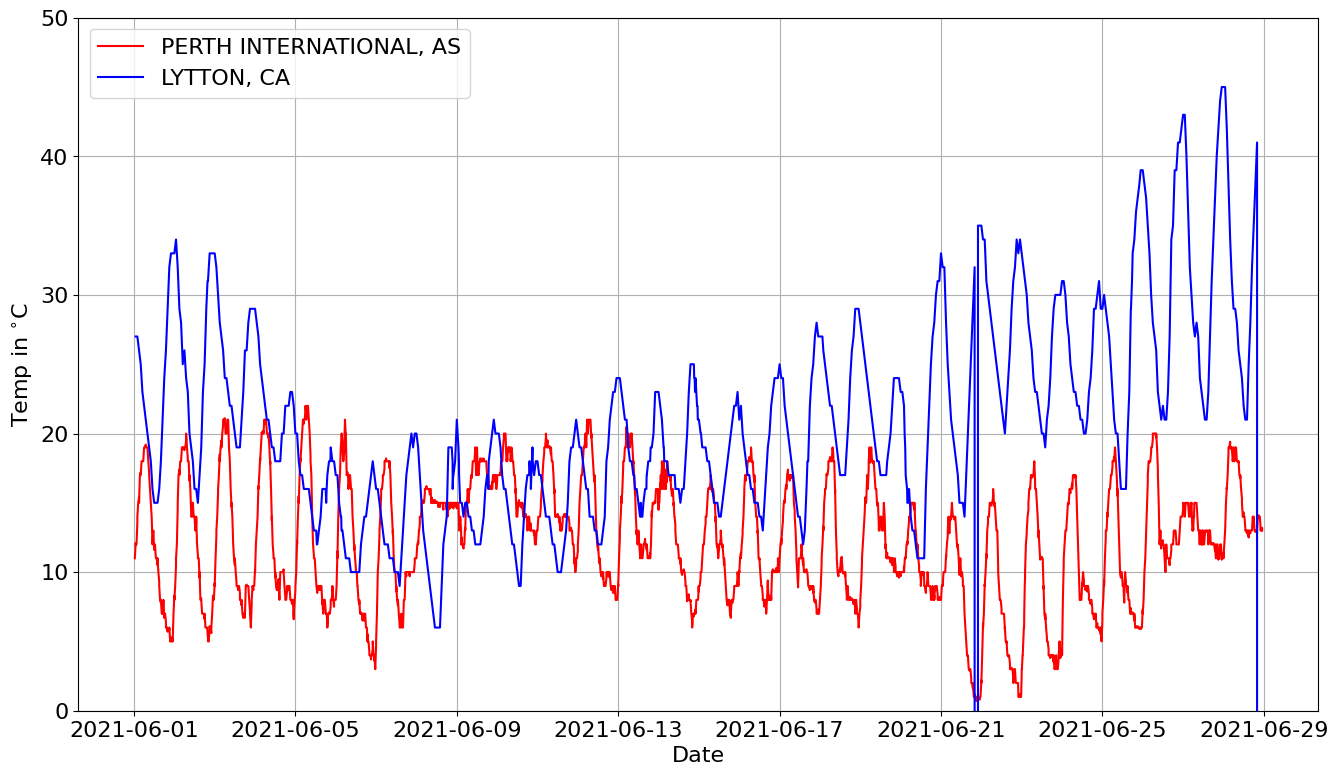

In [5]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(16,9))
plt.plot(pe_iso_time_ser, pe_temp_ser/10, color='red', label=Loc_pe)
plt.plot(vanc_iso_time_ser, vanc_temp_ser/10, color='blue', label=Loc_vanc)
plt.ylim([-20,50])
plt.xlabel("Date")
plt.ylabel(r"Temp in $^{\circ}$C")
plt.grid()
plt.legend(loc='best')
# plt.savefig("Perth_overall.jpg", dpi=100, bbox_inches='tight')

plt.figure(figsize=(16,9))
plt.plot(pe_iso_time_ser[indices_pe], pe_temp_ser[indices_pe]/10, color='red', label=Loc_pe)
plt.plot(vanc_iso_time_ser[indices_vanc], vanc_temp_ser[indices_vanc]/10, color='blue', label=Loc_vanc)
plt.ylim([0,50])
plt.xlabel("Date")
plt.ylabel(r"Temp in $^{\circ}$C")
plt.grid()
plt.legend(loc='best')
# plt.savefig("Perth_and_canada_june.jpg", dpi=100, bbox_inches='tight')